# 서울이 가장 더웠던 날짜와 기온 찾기
## 1. CSV 데이터를 읽어 들이기

In [ ]:
import csv
f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
header = next(data)

i = 1
for row in data:
  print(row)
  if i == 5:
    break
  i = i + 1


f.close()

['\t1907-10-01', '108', '13.5', '7.9', '20.7']
['\t1907-10-02', '108', '16.2', '7.9', '22']
['\t1907-10-03', '108', '16.2', '13.1', '21.3']
['\t1907-10-04', '108', '16.5', '11.2', '22']
['\t1907-10-05', '108', '17.6', '10.9', '25.4']


- `next()`: 첫번째 데이터 행을 읽어오면서 데이터의 탐색 위치를 다음 행으로 이동시키는 명령어

모든 데이터가 문자열로 되어있음을 확인할 수 있다.

## 2. 데이터 변환 및 오류 처리 (1)

문자열 데이터를 실수 데이터로 변환

In [26]:
import csv
f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
header = next(data)

for row in data:
  row[-1] = float(row[-1]) # 최고 기온을 실수로 변형
  # print(row)

f.close()

ValueError: could not convert string to float: ''

- 1950년 8월 31일 데이터가 출력된 이후 에러가 발생
- 1950년 9월 1일 ~ 1953년 11월 30일까지의 데이터는 6.25 전쟁으로 인해 기록된 데이터가 없어서 공백으로 표현되어 있음
- 공백을 실수로 변환할 수 없으므로 에러가 발생

## 2. 데이터 변환 및 오류 처리 (2)
공백을 대체할 특정 값 넣어주기

In [27]:
import csv
f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
header = next(data)


for row in data:
  if row[-1] == '':
    row[-1] = -999 # 최고기온 값 공백을 -999로 대체
    # print(row)
  row[-1] = float(row[-1])

f.close()

## 3. 최종 저장된 데이터를 출력

In [28]:
import csv
max_temp = -999
max_date = ''

f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
header = next(data)

for row in data:
  if row[-1] == '':
    row[-1] = -999
  row[-1] = float(row[-1])
  if max_temp < row[-1]:
    max_date = row[0]
    max_temp = row[-1]
f.close()
print(f'기상 관측 이래로 서울의 최고 기온이 가장 높았던 날은 {max_date}로, {max_temp}도 였습니다.')

기상 관측 이래로 서울의 최고 기온이 가장 높았던 날은 	2018-08-01로, 39.6도 였습니다.


# 내 생일의 기온 변화 그래프 그리기
## 1. 날짜 데이터 추출하기 (1)
매년 5월 22일의 최고 기온 데이터를 추출하여 그래프로 나타내기

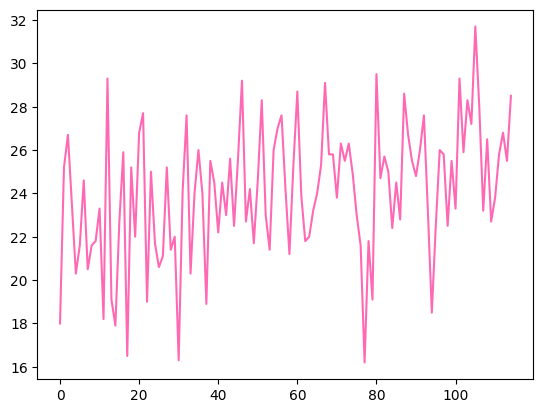

In [29]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

result = []
for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '05' and row[0].split('-')[2] == '22':
      result.append(float(row[-1]))

plt.plot(result, 'hotpink')
plt.show()

## 2. 날짜 데이터 추출하기 (2)
1990년 이후 데이터만 추출해서 그래프 그리기

최고 기온뿐만 아니라 최저 기온 데이터도 함께 나타내기

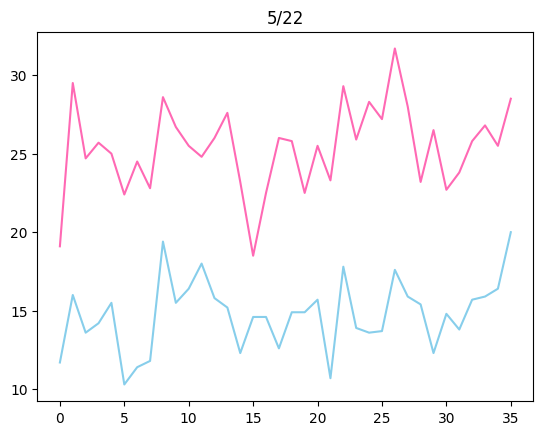

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

high = []
low = []
for row in data:
  if row[-1] != '' and row[-2] != '':
    if 1990 <= int(row[0].split('-')[0]):
      if row[0].split('-')[1] == '05' and row[0].split('-')[2] == '22':
        high.append(float(row[-1]))
        low.append(float(row[-2]))

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
plt.plot(high, 'hotpink')
plt.plot(low, 'skyblue')
plt.title('5/22')
plt.show()

## 3. 히스토그램으로 그리기
생일 월데이터를 이용하여 최고 기온 히스토그램 그리기

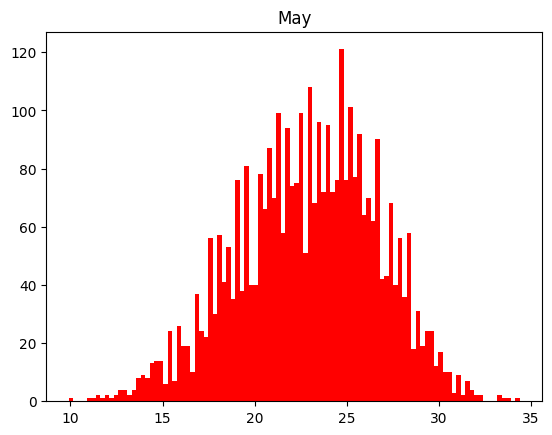

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

may = []
for row in data:
  if row[-1] != '':
    month = row[0].split('-')[1]
    if month == '05':
      may.append(float(row[-1]))

plt.hist(may, bins = 100, color = 'r')
plt.title('May')
plt.show()